# EDA

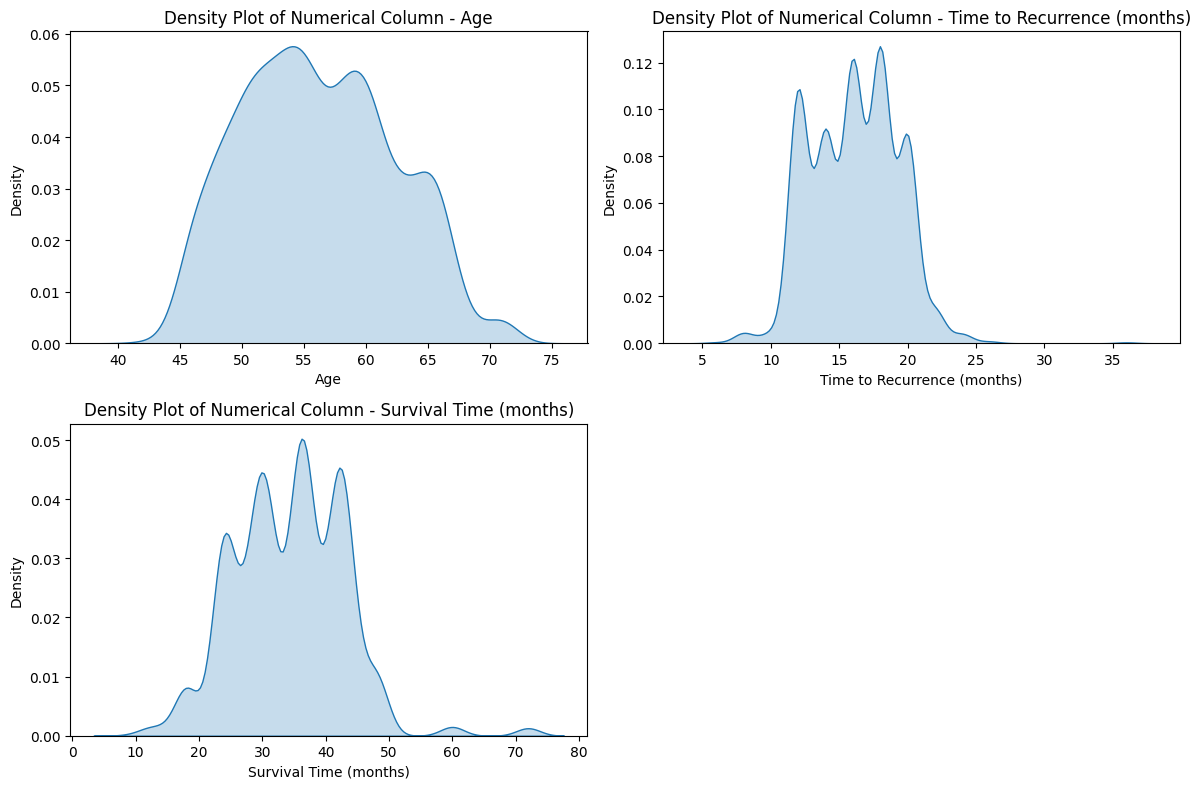

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('BrainTumor.csv')

# Select only numerical features
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Drop 'Patient ID' column as it is irrelevant
if 'Patient ID' in numerical_data.columns:
    numerical_data = numerical_data.drop(columns=['Patient ID'])

# Plot density plots for numerical data
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_data.columns, 1):
    plt.subplot(len(numerical_data.columns) // 2 + 1, 2, i)
    sns.kdeplot(numerical_data[column], fill=True)
    plt.title(f'Density Plot of Numerical Column - {column}')
    plt.tight_layout()
plt.show()

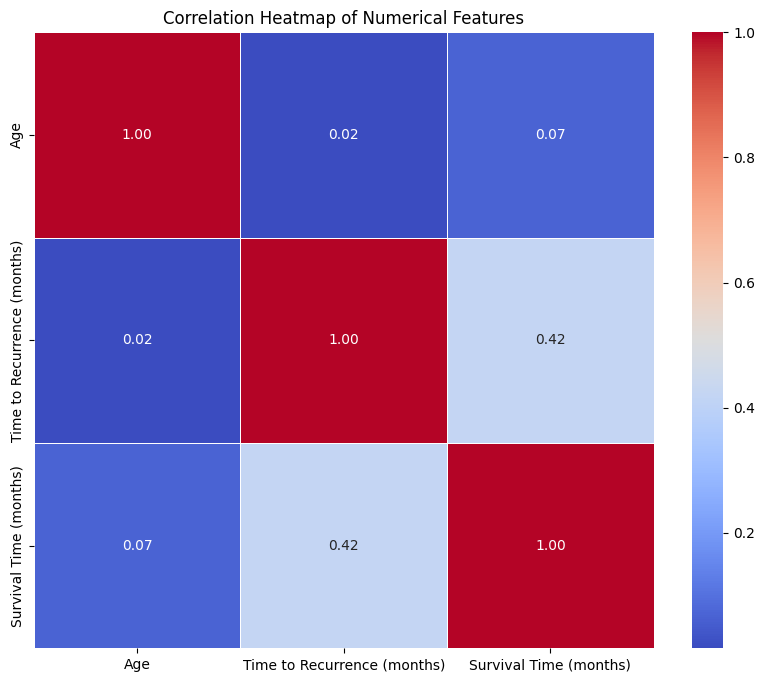

In [195]:
# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

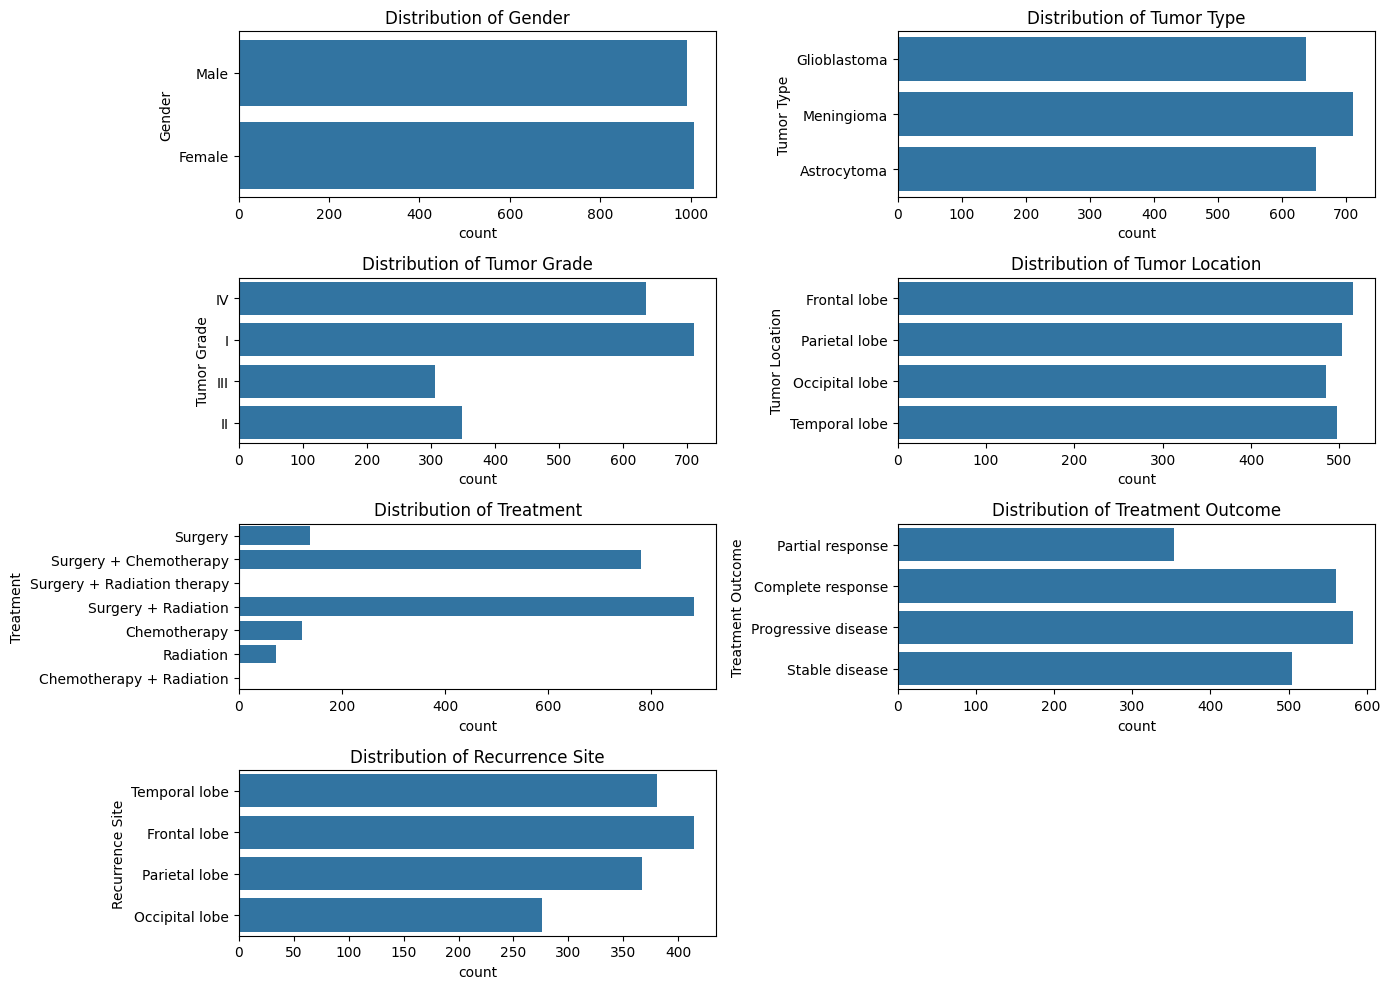

In [196]:
# Select categorical features
categorical_data = data.select_dtypes(include=['object'])

# Plot count plots for categorical data
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_data.columns, 1):
    plt.subplot(len(categorical_data.columns) // 2 + 1, 2, i)
    sns.countplot(y=categorical_data[column])
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

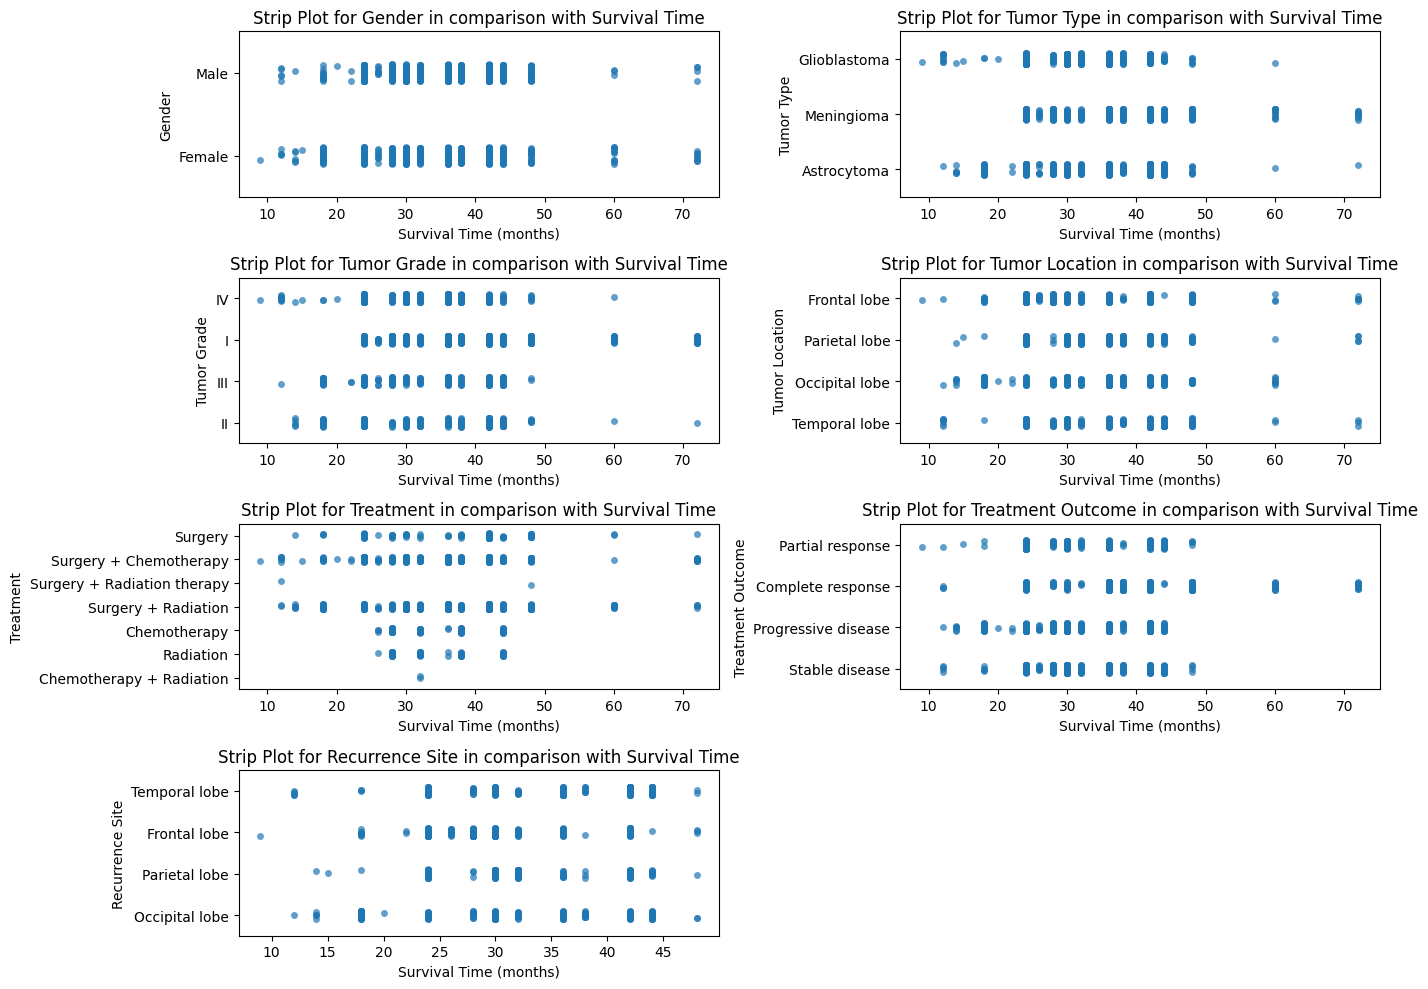

In [197]:
# Strip plots for each categorical feature vs the Survival Time
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_data.columns, 1):
    plt.subplot(len(categorical_data.columns) // 2 + 1, 2, i)
    sns.stripplot(y=data[column], x=data['Survival Time (months)'], alpha=0.7, jitter=True)
    plt.title(f'Strip Plot for {column} in comparison with Survival Time')
    plt.xlabel('Survival Time (months)')
    plt.ylabel(column)
    plt.tight_layout()
plt.show()

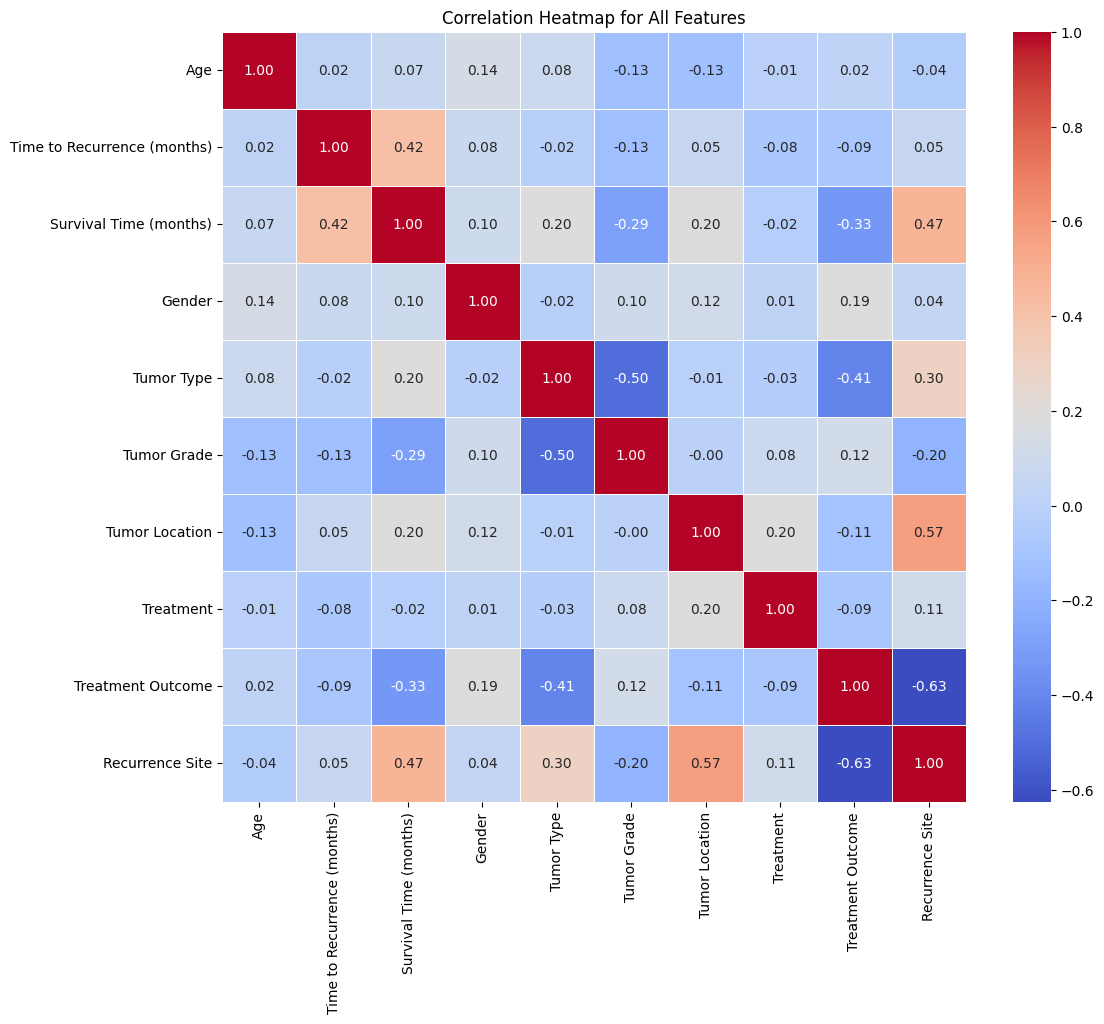

In [198]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
encoded_data = categorical_data.copy()
for column in categorical_data.columns:
    encoded_data[column] = label_encoder.fit_transform(categorical_data[column])

# Combine numerical and encoded categorical data
combined_data = pd.concat([numerical_data, encoded_data], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plot the heatmap with annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for All Features")
plt.show()

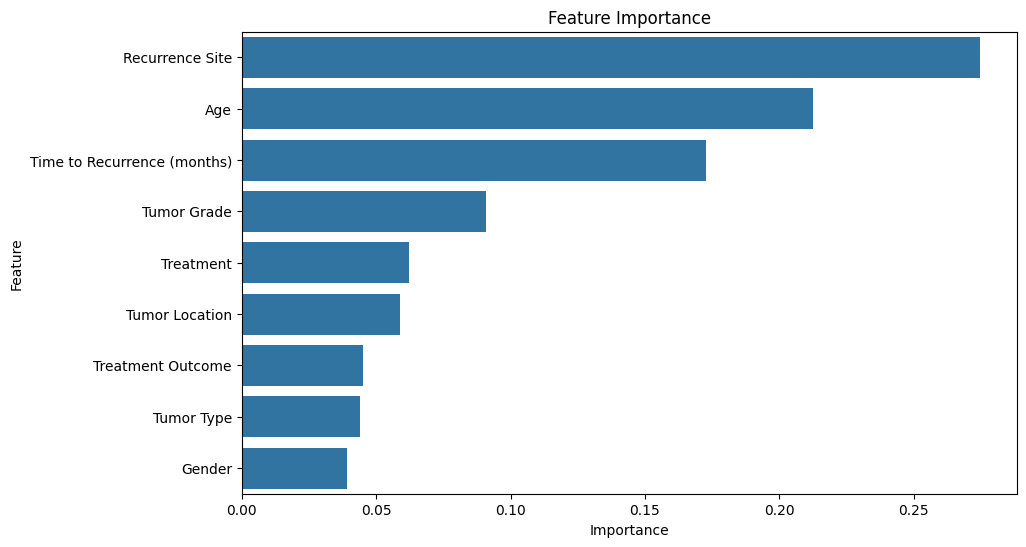

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('BrainTumor.csv')

# Fill missing values with medain
data['Time to Recurrence (months)'] = data['Time to Recurrence (months)'].fillna(data['Time to Recurrence (months)'].median())
data['Recurrence Site'] = data['Recurrence Site'].fillna("Unknown")

# Define categorical and numerical columns
categorical_columns = ['Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome', 'Recurrence Site']
numerical_columns = ['Age', 'Time to Recurrence (months)']

# Label encode categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Prepare features (X) and target (y)
X = data.drop(columns=['Survival Time (months)', 'Patient ID'], errors='ignore')
y = data['Survival Time (months)']

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# PREPROCESSING WITH FEATURE SELECTION

In [200]:
# Load the dataset
data = pd.read_csv('BrainTumor.csv')

# Fill missing values with medians
data['Time to Recurrence (months)'] = data['Time to Recurrence (months)'].fillna(data['Time to Recurrence (months)'].median())
data['Recurrence Site'] = data['Recurrence Site'].fillna("Unknown")

In [201]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_columns = ['Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome', 'Recurrence Site']

# Label encode categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [202]:
import numpy as np

# data engineering
data['Age_TumorGrade'] = data['Age'] * data['Tumor Grade']
data['TumorGrade_TreatmentOutcome'] = data['Tumor Grade'] * data['Treatment Outcome']
data['Age_TimeToRecurrenceRatio'] = data['Age'] / (data['Time to Recurrence (months)'] + 1)
data['Log_TimeToRecurrence'] = np.log1p(data['Time to Recurrence (months)'])
data['Age_Squared'] = data['Age'] ** 2
data['TumorGrade_Squared'] = data['Tumor Grade'] ** 2

In [203]:
from sklearn.preprocessing import StandardScaler

# Prepare features and target
X = data.drop(columns=['Survival Time (months)', 'Patient ID'], errors='ignore')
y = data['Survival Time (months)']

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

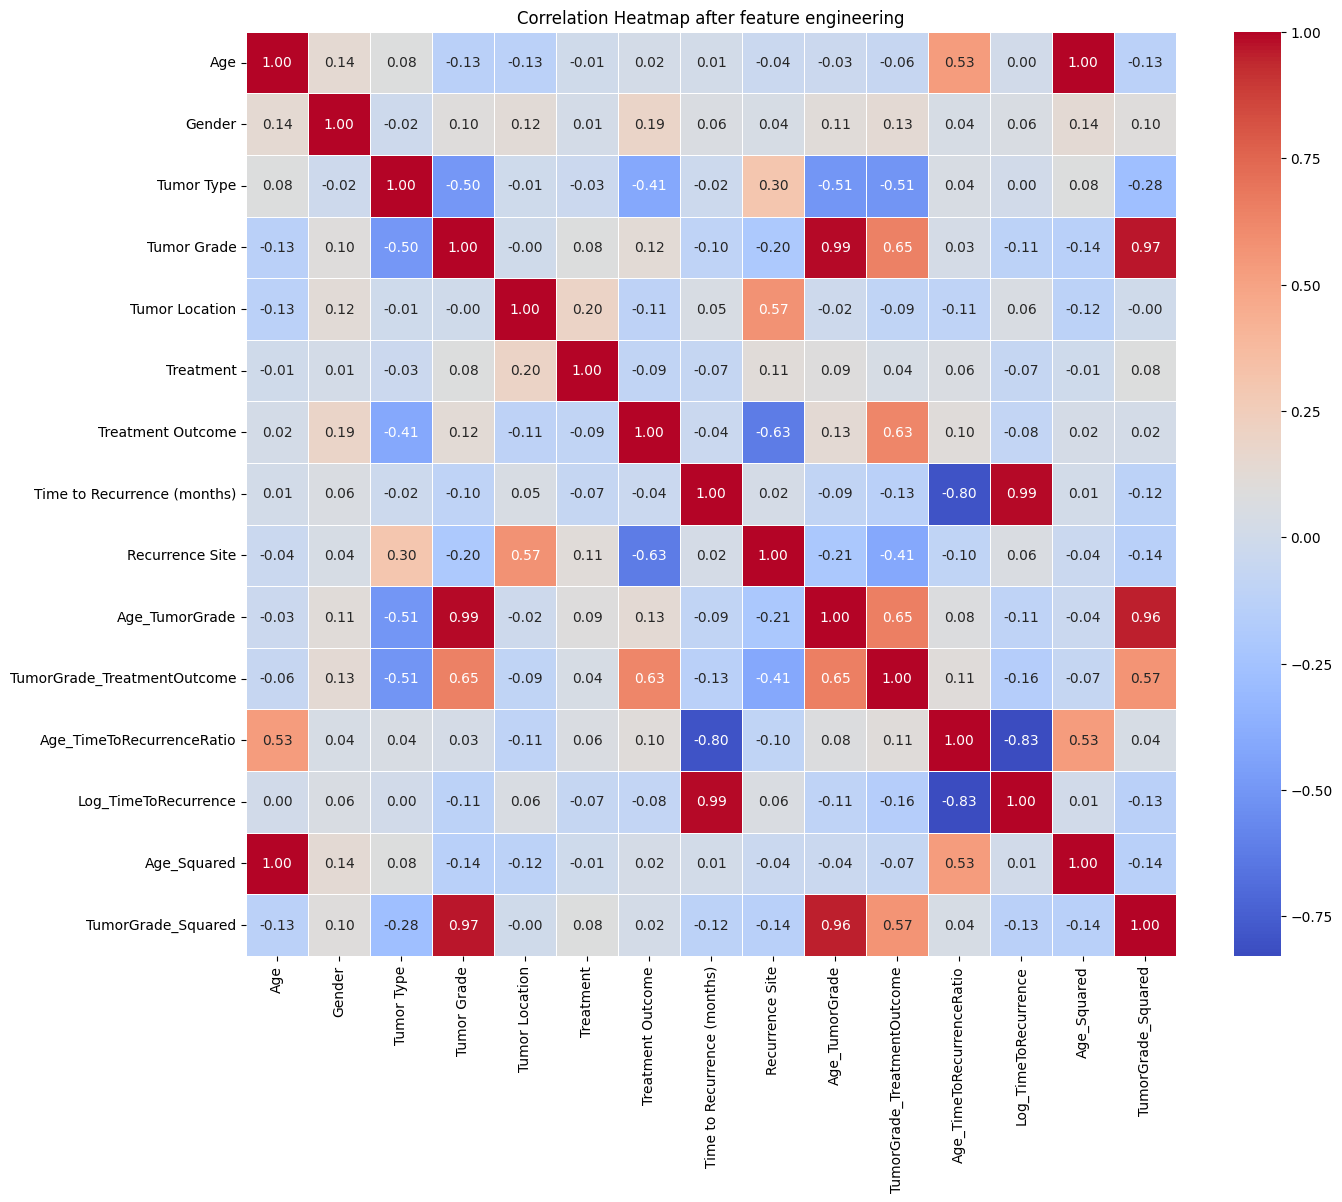

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
correlation_matrix = X_scaled.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap after feature engineering")
plt.show()

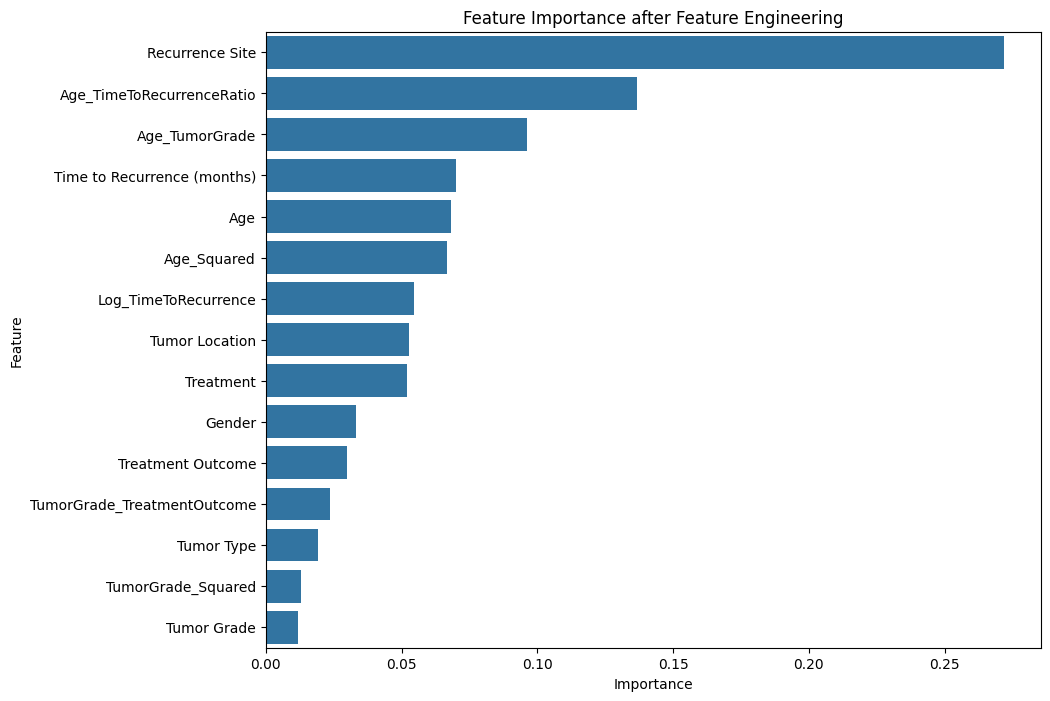

In [205]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance after Feature Engineering')
plt.show()

In [206]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X_train, y_train)

# Get the scores and selected features
feature_scores = selector.scores_
selected_features = X_train.columns[selector.get_support()]

# Update X_train and X_test to only include the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# MODEL TRAINING WITH FEATURE SELECTION

In [207]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost Regressor": XGBRegressor(random_state=42),
}

# Dictionaries to store R², and MSE for each model
r2_scores = {}
mse_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)  # Train the model
    y_pred = model.predict(X_test_selected)  # Predict on the test set

    # Calculate R² score
    r2 = r2_score(y_test, y_pred)
    r2_scores[model_name] = r2

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse

# Display results
print("Model Performance:\n")
for model_name in models.keys():
    print(f"{model_name}:"f" R² Score: {r2_scores[model_name]:.2f}"f", MSE: {mse_scores[model_name]:.2f}")

Model Performance:

Linear Regression: R² Score: 0.38, MSE: 47.43
Decision Tree Regressor: R² Score: 0.71, MSE: 22.41
Support Vector Regressor (SVR): R² Score: 0.33, MSE: 51.12
K-Neighbors Regressor: R² Score: 0.67, MSE: 25.18
Gradient Boosting Regressor: R² Score: 0.63, MSE: 27.96
Random Forest Regressor: R² Score: 0.75, MSE: 18.80
XGBoost Regressor: R² Score: 0.78, MSE: 16.75


In [208]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Convert labels to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train)
y_test_categorical = tf.keras.utils.to_categorical(y_test)

# Ensure input data is in numpy array format
X_train_np = X_train_selected.to_numpy()
X_test_np = X_test_selected.to_numpy()

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs with no improvement to stop training
    restore_best_weights=True  # Restore weights from the epoch with the best validation loss
)

# ANN Implementation
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer for classification
])

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with EarlyStopping and suppressed output
ann_model.fit(
    X_train_np,
    y_train_categorical,
    epochs=200,
    batch_size=32,
    verbose=0,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate ANN
ann_loss, ann_accuracy = ann_model.evaluate(X_test_np, y_test_categorical, verbose=0)
print(f"ANN Accuracy: {ann_accuracy:.2f}, Loss: {ann_loss:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Accuracy: 0.56, Loss: 1.38


In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Ensure input data is reshaped to match Conv1D input requirements
X_train_cnn = X_train_selected.to_numpy().reshape(X_train_selected.shape[0], X_train_selected.shape[1], 1)
X_test_cnn = X_test_selected.to_numpy().reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs with no improvement to stop training
    restore_best_weights=True  # Restore weights from the epoch with the best validation loss
)

# CNN Implementation
cnn_model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2, padding='same'),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2, padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer for classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with EarlyStopping and suppressed output
cnn_model.fit(
    X_train_cnn,
    y_train_categorical,
    epochs=200,
    batch_size=32,
    verbose=0,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_categorical, verbose=0)
print(f"CNN Accuracy: {cnn_accuracy:.2f}, Loss: {cnn_loss:.2f}")

CNN Accuracy: 0.61, Loss: 1.19


In [210]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 9],            # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage to prevent overfitting
    'subsample': [0.6, 0.8, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.5, 1],        # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1]        # L2 regularization term on weights
}

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=70,  # Number of parameter combinations to try
    scoring='r2',  # Metric for evaluation
    cv=10,  # Number of cross-validation folds
    verbose=1,
    random_state=42
)

# Perform randomized search on the training data
randomized_search.fit(X_train_selected, y_train)

# Print the best parameters and best R² score
print("Best parameters found: ", randomized_search.best_params_)

# Get the best model
best_xgb_model = randomized_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_xgb_model.predict(X_test_selected)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("Final R² score with best Parameters: {:.2f}".format(r2))

Fitting 10 folds for each of 70 candidates, totalling 700 fits
Best parameters found:  {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Final R² score with best Parameters: 0.76


# PREPROCESSING WITHOUT FEATURE SELECTION

In [211]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'BrainTumor.csv'
data = pd.read_csv(file_path)

data_cleaned = data.dropna()  # Remove rows with missing values

In [212]:
# Select categorical columns
categorical_columns = ['Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome', 'Recurrence Site']
categorical_data = data_cleaned[categorical_columns]

# Initialize an empty DataFrame to store encoded columns
encoded_data = pd.DataFrame()

# Label encode each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    encoded_data[column + '_encoded'] = label_encoder.fit_transform(categorical_data[column])

In [213]:
# Add numerical features to the encoded DataFrame
numerical_columns = ['Age', 'Time to Recurrence (months)']
numerical_data = data_cleaned[numerical_columns].reset_index(drop=True)

# Combine encoded categorical and numerical features
X = pd.concat([encoded_data.reset_index(drop=True), numerical_data], axis=1)

# Define target variable 'Survival Time (months)'
y = data_cleaned['Survival Time (months)'].reset_index(drop=True)

In [214]:
# Apply Standard Scaling to the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Convert the scaled features into a DataFrame
X_scaled = pd.DataFrame(scaled_features, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MODEL TRAINING WITHOUT FEATURE SELECTION

In [215]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define regression models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost Regressor": XGBRegressor(random_state=42),
}

# Dictionaries to store metrics
r2_scores = {}
mse_scores = {}

# Train, predict, and calculate metrics for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Store metrics
    r2_scores[model_name] = r2
    mse_scores[model_name] = mse

# Print all metrics in a single line for each model
print("Model Performance:\n")
for model_name in models.keys():
    print(f"{model_name}:" f" R² Score: {r2_scores[model_name]:.2f},"f" MSE: {mse_scores[model_name]:.2f}")

Model Performance:

Linear Regression: R² Score: 0.28, MSE: 44.48
Decision Tree Regressor: R² Score: 0.90, MSE: 6.06
Support Vector Regressor (SVR): R² Score: 0.56, MSE: 27.64
K-Neighbors Regressor: R² Score: 0.74, MSE: 15.90
Gradient Boosting Regressor: R² Score: 0.73, MSE: 16.73
Random Forest Regressor: R² Score: 0.90, MSE: 6.09
XGBoost Regressor: R² Score: 0.93, MSE: 4.54


In [216]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Convert labels to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train)
y_test_categorical = tf.keras.utils.to_categorical(y_test)

# Ensure input data is in numpy array format
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',            # Monitor validation loss
    patience=10,                   # Stop training after 10 epochs with no improvement
    restore_best_weights=True      # Restore the best weights
)

# ANN Implementation
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_np.shape[1],)),  # Input + First hidden layer
    Dropout(0.5),                                                      # Add dropout for regularization
    Dense(64, activation='relu'),                                      # Second hidden layer
    Dropout(0.5),                                                      # Add dropout for regularization
    Dense(y_train_categorical.shape[1], activation='softmax')          # Output layer for classification
])

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with EarlyStopping and validation split
ann_model.fit(
    X_train_np,
    y_train_categorical,
    epochs=200,                   # Maximum number of epochs
    batch_size=32,                # Batch size for training
    validation_split=0.2,         # Use 20% of the training data for validation
    verbose=0,                    # Suppress detailed output
    callbacks=[early_stopping]    # Include early stopping callback
)

# Evaluate ANN on the test set
ann_loss, ann_accuracy = ann_model.evaluate(X_test_np, y_test_categorical, verbose=0)
print(f"ANN Accuracy: {ann_accuracy:.2f}, Loss: {ann_loss:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Accuracy: 0.74, Loss: 0.88


In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Reshape input data to match Conv1D input requirements
X_train_cnn = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert labels to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train)
y_test_categorical = tf.keras.utils.to_categorical(y_test)

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',            # Monitor validation loss
    patience=10,                   # Stop training after 10 epochs with no improvement
    restore_best_weights=True      # Restore the best weights
)

# CNN Implementation
cnn_model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),  # Input shape for Conv1D
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),  # First Conv1D layer
    MaxPooling1D(pool_size=2, padding='same'),                            # First MaxPooling layer
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),  # Second Conv1D layer
    MaxPooling1D(pool_size=2, padding='same'),                            # Second MaxPooling layer
    Flatten(),                                                           # Flatten the feature map
    Dense(128, activation='relu'),                                       # Fully connected layer
    Dropout(0.5),                                                        # Dropout for regularization
    Dense(y_train_categorical.shape[1], activation='softmax')            # Output layer for classification
])

# Compile the model
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with EarlyStopping
cnn_model.fit(
    X_train_cnn,
    y_train_categorical,
    epochs=200,                   # Maximum number of epochs
    batch_size=32,                # Batch size for training
    validation_split=0.2,         # Use 20% of training data for validation
    verbose=0,                    # Suppress training output
    callbacks=[early_stopping]    # Add EarlyStopping callback
)

# Evaluate the model on the test set
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_categorical, verbose=0)
print(f"CNN Accuracy: {cnn_accuracy:.2f}, Loss: {cnn_loss:.2f}")

CNN Accuracy: 0.88, Loss: 0.70


In [218]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 9],            # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage to prevent overfitting
    'subsample': [0.6, 0.8, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.5, 1],        # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1]        # L2 regularization term on weights
}

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=70,                # Number of parameter combinations to try
    scoring='r2',             # Metric for evaluation
    cv=10,                    # Number of cross-validation folds
    verbose=1,                # Display progress
    random_state=42           # Reproducibility
)

# Perform randomized search on the training data
randomized_search.fit(X_train, y_train)

# Print the best parameters and best R² score from cross-validation
print("Best parameters found: ", randomized_search.best_params_)

# Get the best model from RandomizedSearchCV
best_xgb_model = randomized_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_xgb_model.predict(X_test)

# Calculate and display the R² score
r2 = r2_score(y_test, y_pred)
print("Final R² score with best parameters: {:.2f}".format(r2))

Fitting 10 folds for each of 70 candidates, totalling 700 fits
Best parameters found:  {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}
Final R² score with best parameters: 0.94
